<a href="https://colab.research.google.com/github/indrajit1984/Deep-learning/blob/code_basics/gd_and_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of stochastic and batch grandient descent in python



We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices.csv")
df.sample(5)

,area,bedrooms,price
3,3600,3,595000
0,2600,3,550000
1,3000,4,565000
5,4100,6,810000
4,4000,5,760000


Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.        , 0.        ],
       [0.26666667, 0.33333333],
       [0.4       , 0.        ],
       [0.66666667, 0.        ],
       [0.93333333, 0.66666667],
       [1.        , 1.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [4]:
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [5]:
scaled_y.reshape(6,)

array([0.        , 0.05769231, 0.23076923, 0.17307692, 0.80769231,
       1.        ])

Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

price = w1 * area + w2 * bedroom + bias

Now is the time to implement mini batch gradient descent

In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    #creating 2 array to capture the numbers with each iteration to print as graph
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

# transpose needed as matrix dot product required row of array1 to match
        # with column of array2


        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) #gradient decent calculation
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)


        #updating weight and bias
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.58867904, 0.57701192]),
 np.float64(-0.14323766628236548),
 np.float64(0.011394412598084299))

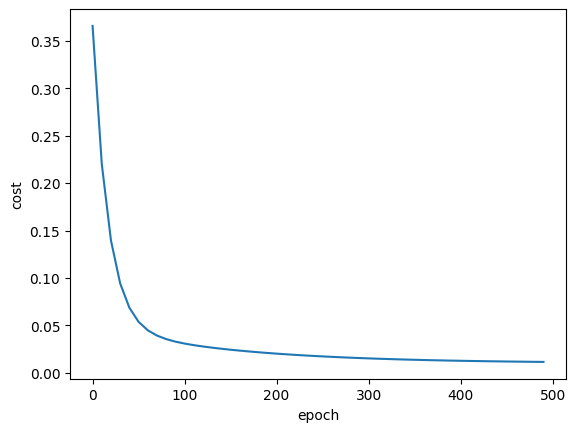

In [7]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [9]:
print (scaled_X)

[[0.         0.        ]
 [0.26666667 0.33333333]
 [0.4        0.        ]
 [0.66666667 0.        ]
 [0.93333333 0.66666667]
 [1.         1.        ]]


In [27]:
def predict(area,bedrooms,w,b):

    # Create a DataFrame with column names for the input to sx.transform
    # This ensures consistency with how sx was originally fitted
    input_data = pd.DataFrame([[area, bedrooms]], columns=['area', 'bedrooms'])
    scaled_X = sx.transform(input_data)[0]

    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b #values of w,b used in this calculation received from GD functiona above
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    #return sy.inverse_transform([[scaled_price]])[0][0]
    return round(sy.inverse_transform([[scaled_price]])[0][0])

In [28]:
predict(4100,7,w,b)

865846

Stochastic Gradient Descent Implementation


Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [29]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

1

In [30]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.54847493, 0.52069847]),
 np.float64(-0.0914600449266252),
 np.float64(0.00842098615919539))

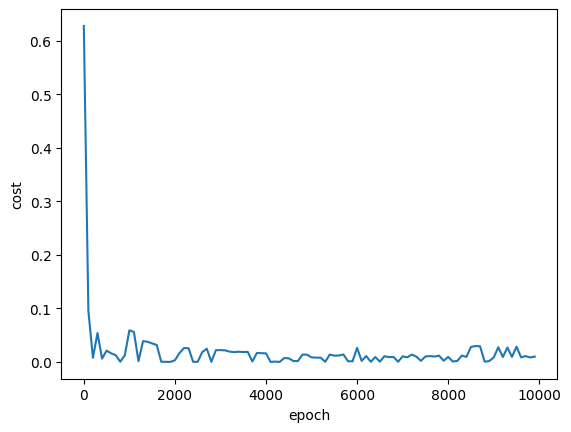

In [31]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)